In [1]:
import matplotlib.pyplot as plt
import readsnapGadget2 as snap
import numpy as np
from copy import copy

In [2]:
# give some particles for test purpose
boxsize = 10
pos = np.array([[0, 0, 0],
                [0, 1, 0],
                [1, 0, 0],
                [5, 5, 0],
                [6, 6, 0],
                [9.3, 9.3, 1],
                [4, 8, 0],
                [5.5, 3.9, 0],
                [8, 2, 0],
                [9, 9, 0],
                [2, 1, 0],
                [2, 2, 0],
                [2.2, 2.2, 1],
                [2.4, 2.4, 2],
                [1, 1, 3]
               ]) # positions of all particles
particles = pos # The positions of particles still left to be grouped
part_mass = 1       

In [3]:
particles

array([[0. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [5. , 5. , 0. ],
       [6. , 6. , 0. ],
       [9.3, 9.3, 1. ],
       [4. , 8. , 0. ],
       [5.5, 3.9, 0. ],
       [8. , 2. , 0. ],
       [9. , 9. , 0. ],
       [2. , 1. , 0. ],
       [2. , 2. , 0. ],
       [2.2, 2.2, 1. ],
       [2.4, 2.4, 2. ],
       [1. , 1. , 3. ]])

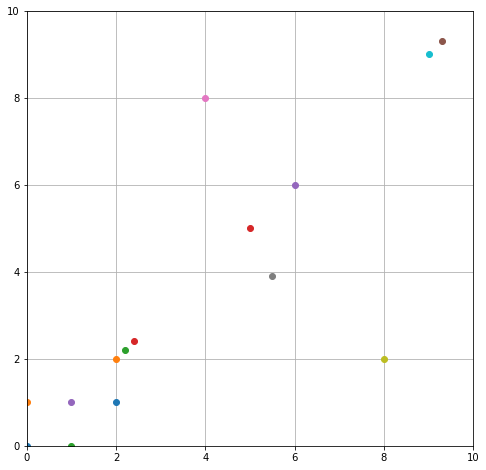

In [6]:
# plot particle locations in 2d
plt.figure(figsize=(8,8))
for i in range(len(pos)):
    plt.plot(pos[i, 0], pos[i, 1], 'o')
plt.xlim(0, boxsize)
plt.ylim(0, boxsize)
plt.grid()

In [7]:
link_len = np.sqrt(2) + 0.01 # define a link length within which two particles will be friends

In [8]:
def distance(other_particles, particle):
    # get the differece in x, y, z coordinates
    dx = other_particles[:, 0] - particle[0]
    dy = other_particles[:, 1] - particle[1]
    dz = other_particles[:, 2] - particle[2]
    # account for periodic boundary conditions
    dx[dx > boxsize/2] = boxsize - dx[dx > boxsize/2]
    dy[dy > boxsize/2] = boxsize - dy[dy > boxsize/2]
    dz[dz > boxsize/2] = boxsize - dz[dz > boxsize/2]
    
    dist = (dx**2 + dy**2 + dz**2)**0.5
    return dist

In [9]:
# dictionary to hold groups
groups = {}
sizes = {}

# initial group id to label groups
group_id = 0

# loop while there are still particles to be grouped
while len(particles) > 0:
    
    '''Find the friends of the first particle from the list of left-over particles''' 
    part = particles[0] # get location of the first particle 
    
    # calculate distance to the particle of interest for all other particles that have not been grouped
    dists = distance(particles, part)
    
    # determine which are within the linking length
    mask = np.where(dists < link_len)[0]
    
    # add these particles' positions to the current group 
    groups[group_id] = particles[mask]

    # drop these particles from particle list
    particles = np.delete(particles, mask, axis=0)
    
    '''Find the friends of friends of part'''
    pointer = 1 # index of the friend for whom we are looking for more friends
                # namely this points at the index of the elements in the current group: groups[group_id]
    # loop over all the friends in the current group to find their friends
    while pointer < len(groups[group_id]):
        
        # get position of the friend being considered
        part_friend = groups[group_id][pointer]
        
        # repeat above analysis for that friend 
        dists = distance(particles, part_friend)
       
        # determine which are within the linking length
        mask = np.where(dists < link_len)[0]
        
        # if we found friends of that friend,
        if len(mask) > 0:
            
            friends_of_friend = particles[mask]
            
            # add them to the current group
            groups[group_id] = np.concatenate([groups[group_id], friends_of_friend])
            
            # remove them from the remaining particles list
            particles = np.delete(particles, mask, axis=0)

        # move on to the next friend in the current group
        pointer +=1
    
    '''Current group completed. Move on to the next group'''
    sizes[group_id] = len(groups[group_id]) # record the group size 
    group_id += 1   

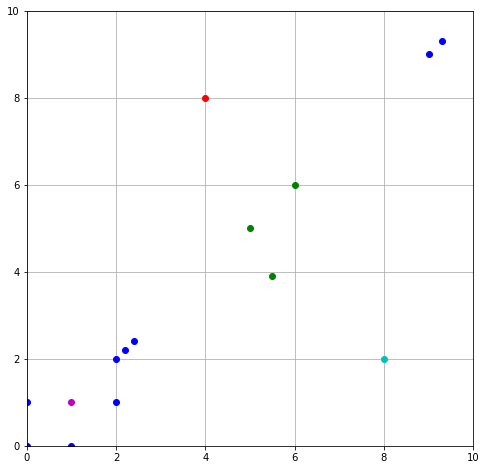

In [10]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(8,8))
for i in range(group_id):
    for j in range(sizes[i]):
        plt.plot(groups[i][j][0], groups[i][j][1], 'o', color=colorlist[i%7])
plt.xlim(0, boxsize)
plt.ylim(0, boxsize)
plt.grid()

In [11]:
groups

{0: array([[0. , 0. , 0. ],
        [0. , 1. , 0. ],
        [1. , 0. , 0. ],
        [9.3, 9.3, 1. ],
        [9. , 9. , 0. ],
        [2. , 1. , 0. ],
        [2. , 2. , 0. ],
        [2.2, 2.2, 1. ],
        [2.4, 2.4, 2. ]]), 1: array([[5. , 5. , 0. ],
        [6. , 6. , 0. ],
        [5.5, 3.9, 0. ]]), 2: array([[4., 8., 0.]]), 3: array([[8., 2., 0.]]), 4: array([[1., 1., 3.]])}

In [12]:
sizes

{0: 9, 1: 3, 2: 1, 3: 1, 4: 1}